In [1]:
from generator import fast_sbm, create_connectivity_matrix
from diagonalizer import compute_eigenvalues
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

In [5]:
def true_eigenvectors(eta, n):
    """Generates the two right-eigenvectors in the two-blocks model. """
    x = np.zeros(n)
    y = np.zeros(n)
    half = int(n/2)
    x[:half] = np.sqrt(eta)
    x[half:] = np.sqrt(1-eta)
    y[:half] = np.sqrt(eta)
    y[half:] =  - np.sqrt(1-eta)

    result = [x/np.linalg.norm(x), y/np.linalg.norm(y)]
    return result
    
def theoretical_overlaps(eta, p=10):
    """
    Computes the 4 theoretical overlaps a11, a12, a22, a21 for the model with two blocks of     equal size, and connectivity matrix given by [[p/2, p * eta, p * (1 - eta), p/2]].
   
    Inputs:
        - asymmetry parameter eta between 1/2 and 1
        - degree parameter p (default 10)
    
    Outputs:
        - the (2, 2) array with the overlaps. 
    """

    Pi = np.array([[p/4, p*eta/2], [p*(1-eta)/2, p/4]]) #modularity matrix
    
    eigenvalues = [p/4 + sign * (p/2) * np.sqrt(eta * (1 - eta))  for sign in [1, -1]]
    
    Mat = [ np.linalg.inv((np.eye(2) - (1/eigval**2) * Pi)) for eigval in eigenvalues]

    F = [np.array([np.sqrt(eta), sign * np.sqrt(1 - eta)]) for sign in [1, -1]] # unit right eigenvectors

    X = [ np.dot(np.ones(2), Mat[i] @ F[i]**2) for i in range(2) ]
    
    result = np.zeros((2,2))
    #alt = np.zeros((2,2))
    if eigenvalues[1]**2 >= eigenvalues[0]: #above the threshold, the two eigenvectors have nontrivial correlation
        for i in range(2):
            for j in range(2):
                result[i,j] =  np.sqrt(1/X[i]) * np.dot(F[i], F[j])
    
    else:#only the first eigvec is correlated
        for j in range(2):
            result[0,j] =  np.sqrt(1/X[0]) * np.dot(F[0], F[j])
    
    return result



In [43]:
#Main parameters
n = 1000 #size of the network
n_samples = 10
n_clusters = 2
p = 10  # mean apriori degree
n_eta = 200 #number of etas between 1/2 and 1 we're going to test
eta_list = np.linspace(0.5, 1, n_eta)

empirical_overlap = np.zeros((2, 2, n_eta, n_samples))
theoretical_overlap = np.zeros((2, 2, n_eta))
alt = np.zeros((2, 2, n_eta))

for i in range(n_eta):
    if i%5==0:print("Xp number {}/{}".format(i, n_eta))
    eta = eta_list[i]
    true_vecs = true_eigenvectors(eta, n)
    theoretical_overlap[:, :, i] = theoretical_overlaps(eta, p) #here : fonction
    
    for sample in range(n_samples):
        F, eigvals_of_F = create_connectivity_matrix(p / 2, p * eta, p * (1 - eta), p / 2)
        A = fast_sbm(n, F = F)
        eigenvalues, eigenvectors = compute_eigenvalues(A, k=2, is_sym=False, return_eigenvectors=True)

        for a in range(2):
            for b in range(2):
                # we compute the four overlaps between empirical eigenvectors and true eigenvectors
                empirical_overlap[a,b,i,sample] = np.abs(np.dot(eigenvectors[:,a], true_vecs[b]))

#print(empirical_overlap)
mean_empirical_overlap = np.mean(empirical_overlap, axis = 3)
std_empirical_overlap = np.std(empirical_overlap, axis = 3)

Xp number 0/200
Xp number 5/200
Xp number 10/200
Xp number 15/200
Xp number 20/200
Xp number 25/200
Xp number 30/200
Xp number 35/200
Xp number 40/200
Xp number 45/200
Xp number 50/200
Xp number 55/200
Xp number 60/200
Xp number 65/200
Xp number 70/200
Xp number 75/200
Xp number 80/200
Xp number 85/200
Xp number 90/200
Xp number 95/200
Xp number 100/200
Xp number 105/200
Xp number 110/200
Xp number 115/200
Xp number 120/200
Xp number 125/200
Xp number 130/200
Xp number 135/200
Xp number 140/200
Xp number 145/200
Xp number 150/200
Xp number 155/200
Xp number 160/200
Xp number 165/200
Xp number 170/200
Xp number 175/200
Xp number 180/200
Xp number 185/200
Xp number 190/200
Xp number 195/200


Text(0.5, -0.04, '$\\eta$')

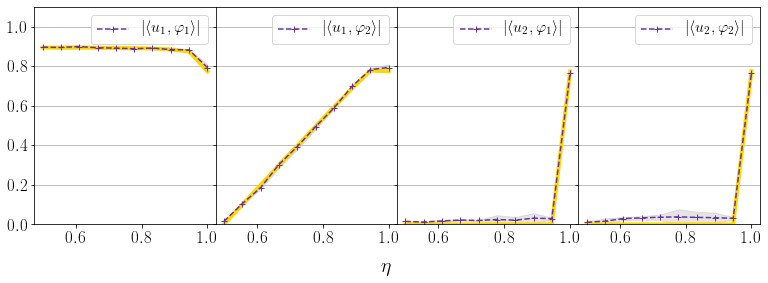

In [10]:
titles = [r"$|\langle u_{}, \varphi_{} \rangle|$".format(1 + i//2, 1 + i%2) for i in range(4)]

fig, ax = plt.subplots(ncols=4, sharey=True, gridspec_kw={'wspace': 0}, figsize=(13, 4))

for i in range(2):
    for j in range(2):
        errsup = mean_empirical_overlap[i, j, :] + std_empirical_overlap[i, j, :]
        errinf = mean_empirical_overlap[i, j, :] - std_empirical_overlap[i, j, :]
        ax[2*i+j].yaxis.grid(True)
        ax[2*i+j].set_ylim(0, 1.1)
        ax[2*i+j].plot(eta_list, theoretical_overlap[i,j,:], color='gold', linewidth = 4)
        
        ax[2*i+j].fill_between(eta_list, errinf, errsup,color='gray', alpha=0.2)
        ax[2*i+j].plot(eta_list, mean_empirical_overlap[i,j,:], 'o--', markersize=6, marker = '+', color='rebeccapurple', label = titles[2*i + j])
        ax[2*i+j].label_outer()
        #ax[2*i+j].set_xlabel(titles[2*i+j], fontsize=20)
        ax[2*i+j].set_xticks([0.6, 0.8, 1.0])
        ax[2*i+j].tick_params(axis='both', which='major', labelsize=17)
        ax[2*i+j].legend(loc=0, fontsize=16)
#ax[0].set_ylabel("correlation", fontsize = 20)
fig.text(0.5, -0.04, r"$\eta$", ha='center', fontsize = 20)



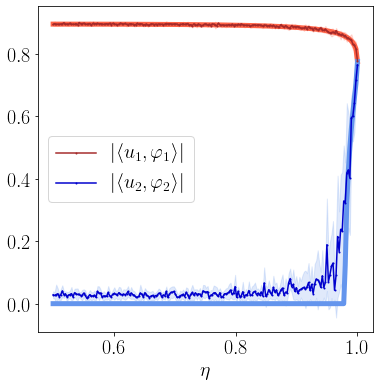

In [49]:
colors=["tomato", "cornflowerblue"]
darker = ["brown", "mediumblue"]
legends = [r"$|\langle u_1, \varphi_1 \rangle |$", r"$|\langle u_2, \varphi_2 \rangle |$"]
fsize=20

fix, ax = plt.subplots(figsize=(6,6))
for i in range(2):

    errsup = mean_empirical_overlap[i, i, :] + std_empirical_overlap[i, i, :]
    errinf = mean_empirical_overlap[i, i, :] - std_empirical_overlap[i, i, :]
    ax.fill_between(eta_list, errinf, errsup,color=colors[i], alpha=0.2)
    ax.plot(eta_list, mean_empirical_overlap[i,i,:], '-', markersize=1, marker = 'o', color=darker[i], label = legends[i], zorder=10)

    ax.plot(eta_list, theoretical_overlap[i,i,:], color=colors[i], linewidth = 5)
ax.legend(loc=0, fontsize=fsize)
ax.set_xlabel(r"$\eta$", fontsize = 30)
ax.tick_params(axis='both', labelsize=fsize )


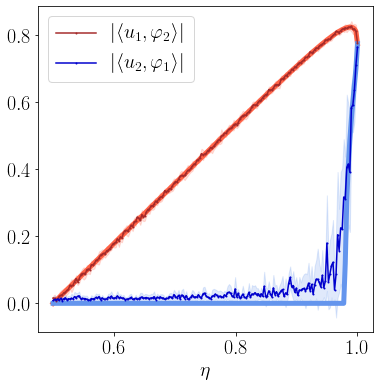

In [52]:
colors=["tomato", "cornflowerblue"]
darker = ["brown", "mediumblue"]
legends = [r"$|\langle u_1, \varphi_2 \rangle |$", r"$|\langle u_2, \varphi_1 \rangle |$"]
fsize=20

fix, ax = plt.subplots(figsize=(6,6))
for i in range(2):
    j = (i-1)**2
    errsup = mean_empirical_overlap[i, j, :] + std_empirical_overlap[i, j, :]
    errinf = mean_empirical_overlap[i, j, :] - std_empirical_overlap[i, j, :]
    ax.fill_between(eta_list, errinf, errsup,color=colors[i], alpha=0.2)
    ax.plot(eta_list, mean_empirical_overlap[i,j,:], '-', markersize=1, marker = 'o', color=darker[i], label = legends[i], zorder=10)

    ax.plot(eta_list, theoretical_overlap[i,j,:], color=colors[i], linewidth = 5)
ax.legend(loc=0, fontsize=fsize)
ax.set_xlabel(r"$\eta$", fontsize = 30)
ax.tick_params(axis='both', labelsize=fsize )
